In [3]:
import pandas as pd
import numpy as np
import datetime
import sqlite3
import matplotlib.pyplot as plt
%matplotlib inline 
from random import sample
from functools import reduce
import re
import seaborn as sns

## Treating dropping off and picking up from neighboring taxi zones as cruising

In [4]:
cruise_time_15m = pd.read_csv('../data/cruise_time_15m.csv')
cruise_time_adjacent_sample_15m = pd.read_csv('../data/cruise_time_adjacent_sample_15m.csv')

### Cruise time at time index t and taxi zone z -- Minute

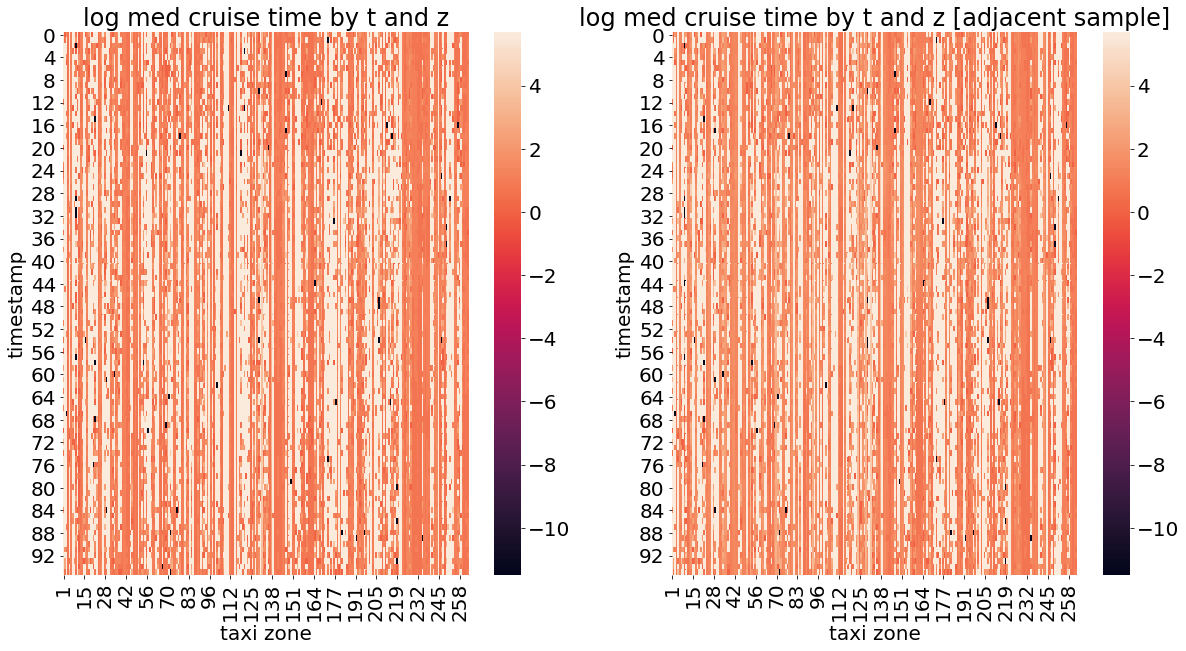

In [9]:
cruise_df = cruise_time_15m.copy()
cruise_df['med_cruise_time'] = np.log(cruise_df['med_cruise_time'] + 1e-5)
cruise_df = cruise_df.pivot_table(index='dropoff_datetime_index', 
                                  columns='taxizone_id', 
                                  values='med_cruise_time')
cruise_df.fillna(np.log(300), inplace=True)

cruise_df_imputed_heatmap = cruise_time_adjacent_sample_15m.copy()
cruise_df_imputed_heatmap['med_cruise_time'] = np.log(cruise_df_imputed_heatmap['med_cruise_time'] + 1e-5)
cruise_df_imputed_heatmap = cruise_df_imputed_heatmap\
                        .pivot_table(index='dropoff_datetime_index', 
                                     columns='taxizone_id', 
                                     values='med_cruise_time')
cruise_df_imputed_heatmap.fillna(np.log(300), inplace=True)

plt.rcParams.update({'font.size': 20})
fig, ax = plt.subplots(1,2, figsize=(20, 10))
sns.heatmap(cruise_df, ax=ax[0])
ax[0].set_title('log med cruise time by t and z')
ax[0].set_xlabel('taxi zone')
ax[0].set_ylabel('timestamp')

sns.heatmap(cruise_df_imputed_heatmap, ax=ax[1])
ax[1].set_title('log med cruise time by t and z [adjacent sample]')
ax[1].set_xlabel('taxi zone')
ax[1].set_ylabel('timestamp')
fig.savefig('../fig/heatmap_cruise_time_adjacent_sample_minute.png')

### Cruise time at time index t and taxi zone z -- Interval

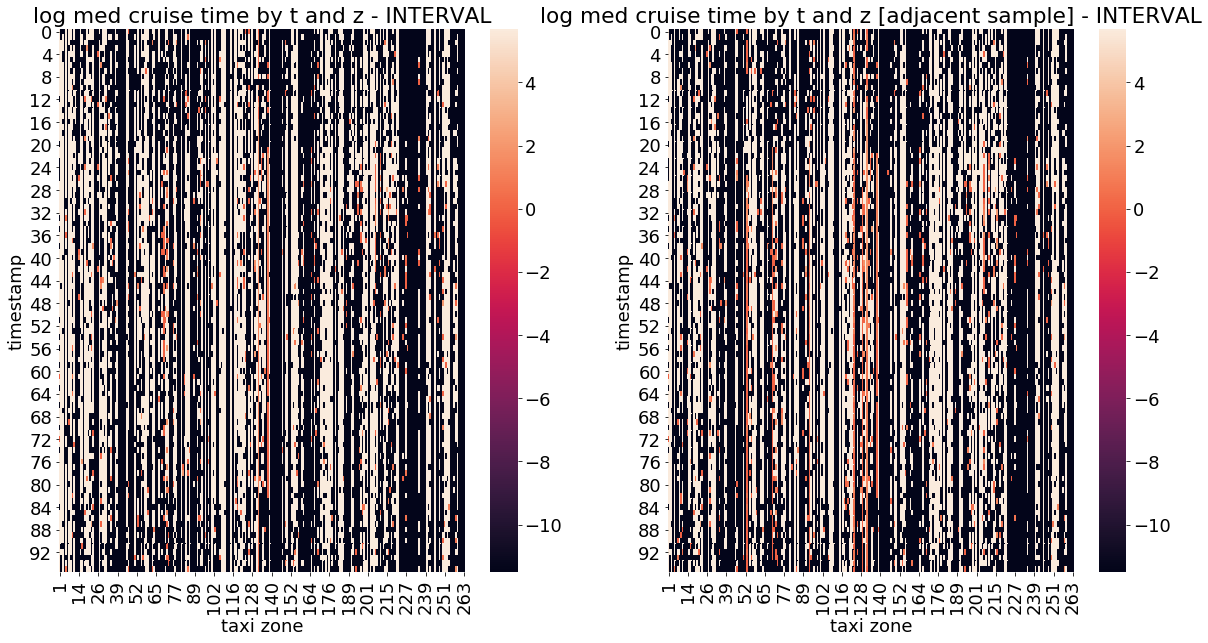

In [11]:
cruise_df = cruise_time_15m.copy()
cruise_df['med_cruise_time_INT'] = np.log(cruise_df['med_cruise_time_INT'] + 1e-5)
cruise_df = cruise_df.pivot_table(index='dropoff_datetime_index', 
                                  columns='taxizone_id', 
                                  values='med_cruise_time_INT')
cruise_df.fillna(np.log(300), inplace=True)

cruise_df_imputed_heatmap = cruise_time_adjacent_sample_15m.copy()
cruise_df_imputed_heatmap['med_cruise_time_INT'] = np.log(cruise_df_imputed_heatmap['med_cruise_time_INT'] + 1e-5)
cruise_df_imputed_heatmap = cruise_df_imputed_heatmap\
                        .pivot_table(index='dropoff_datetime_index', 
                                     columns='taxizone_id', 
                                     values='med_cruise_time_INT')
cruise_df_imputed_heatmap.fillna(np.log(300), inplace=True)

plt.rcParams.update({'font.size': 18})
fig, ax = plt.subplots(1,2, figsize=(20, 10))
sns.heatmap(cruise_df, ax=ax[0])
ax[0].set_title('log med cruise time by t and z - INTERVAL')
ax[0].set_xlabel('taxi zone')
ax[0].set_ylabel('timestamp')

sns.heatmap(cruise_df_imputed_heatmap, ax=ax[1])
ax[1].set_title('log med cruise time by t and z [adjacent sample] - INTERVAL')
ax[1].set_xlabel('taxi zone')
ax[1].set_ylabel('timestamp')
fig.savefig('../fig/heatmap_cruise_time_adjacent_sample_interval15.png')

## ====